In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pygments import highlight
from scipy.stats import entropy
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("fifa_players.csv")
#df.shape
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [3]:
df["full_name"].str.strip()

0          Lionel Andrés Messi Cuccittini
1            Christian  Dannemann Eriksen
2                              Paul Pogba
3                         Lorenzo Insigne
4                       Kalidou Koulibaly
                       ...               
17949                      Rory  McKenzie
17950                       Michal Sipľak
17951                         Jan Bekkema
17952                 Abdulrahman Al Yami
17953    José Francisco dos Santos Júnior
Name: full_name, Length: 17954, dtype: object

In [4]:
#std_age = df["age"].std()
std_overall = df["overall_rating"].std()
#std_age
std_overall

np.float64(6.9637297873224355)

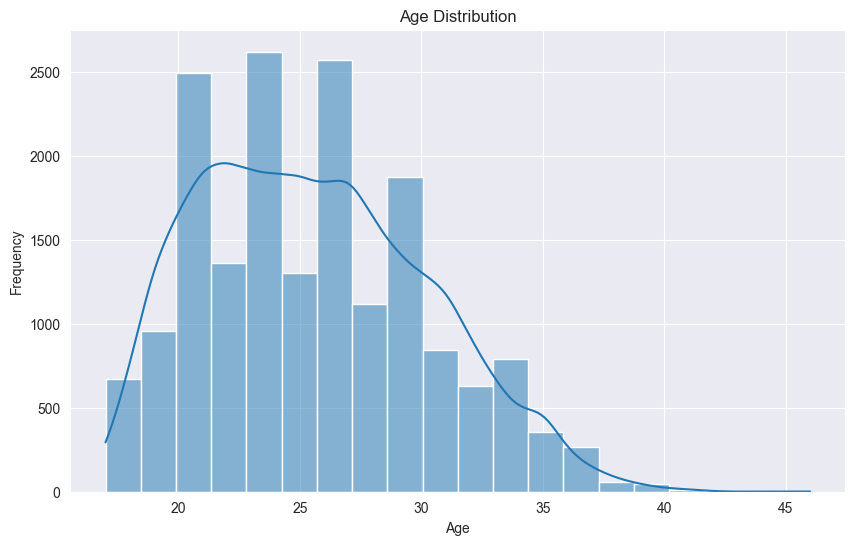

In [5]:
plt.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [6]:
correlation = df[['age', 'overall_rating']].corr()
correlation



,age,overall_rating
age,1.000000,0.461529
overall_rating,0.461529,1.000000


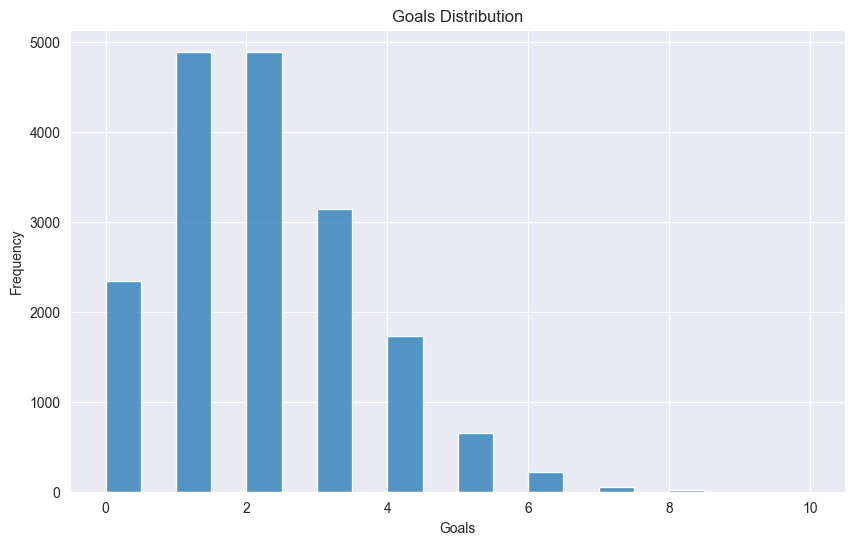

In [7]:
if 'goals' not in df.columns:
    df['goals'] = np.random.poisson(lam = 2, size = len(df))

    plt.figure(figsize = (10,6))
    sns.histplot(df["goals"], bins=20, kde=False)
    plt.title("Goals Distribution")
    plt.xlabel("Goals")
    plt.ylabel("Frequency")
    plt.show()


In [8]:
mean_age = df["age"].mean()
median_age = df["age"].median()

mean_overall = df["overall_rating"].mean()
median_overall = df["overall_rating"].median()

#mean_age
#median_age
#mean_overall
#median_overall

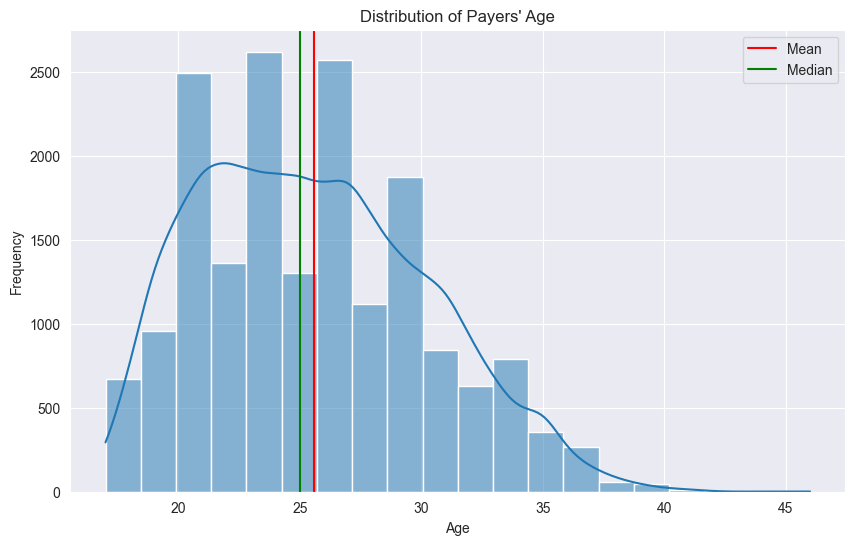

In [9]:
plt.figure(figsize = (10,6))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribution of Payers\' Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axvline(mean_age, color='red', label='Mean')
plt.axvline(median_age, color='green', label='Median')
plt.legend()
plt.show()

In [10]:
def gini(array):
    array = array.flatten().astype(float)
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]

    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))

gini_index = gini(df['overall_rating'].values)
gini_index

np.float64(0.059080790935207926)

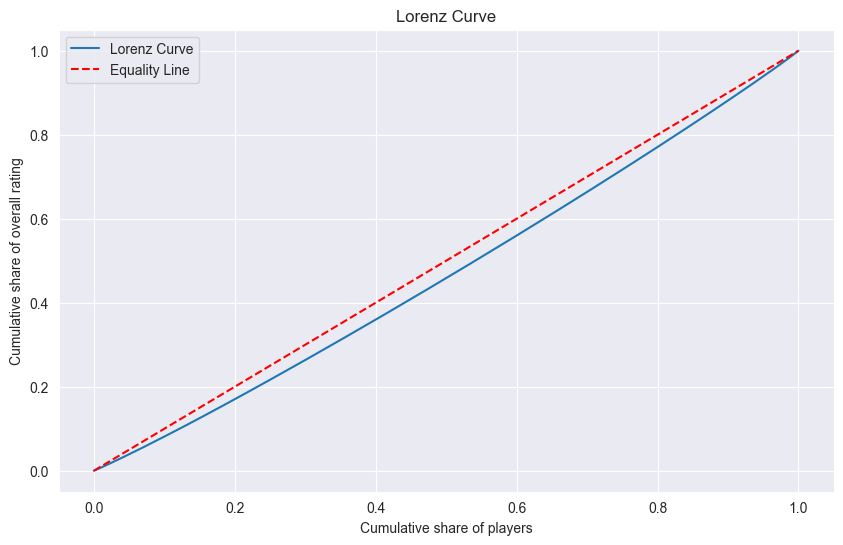

In [11]:
def lorenz_curve(array):
    array = array.flatten().astype(float)
    array = np.sort(array)
    array_cumsum = np.cumsum(array)
    lorenz_curve = array_cumsum / array_cumsum[-1]
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    return lorenz_curve


lorenz = lorenz_curve(df['overall_rating'].values)


plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.0, 1.0, lorenz.size), lorenz, label='Lorenz Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Equality Line')
plt.title('Lorenz Curve')
plt.xlabel('Cumulative share of players')
plt.ylabel('Cumulative share of overall rating')
plt.legend()
plt.show()

In [12]:
def calculate_entropy(column):
    values_counts = column.value_counts()
    probabilities = values_counts / len(column)
    return entropy(probabilities)

overall_rating_entropy = calculate_entropy(df['overall_rating'])
overall_rating_entropy


np.float64(3.351809661598563)

In [13]:
def information_gain(df,overall_rating_col, target_col):
    overall_rating_entropy = calculate_entropy(df[overall_rating_col])
    target_entropy = calculate_entropy(df[target_col])

    joint_entropy = calculate_entropy(df[[overall_rating_col, target_col]])

    return overall_rating_entropy - joint_entropy

gain = information_gain(df, 'overall_rating', 'value_euro')
gain

np.float64(-3.1717363707311623)

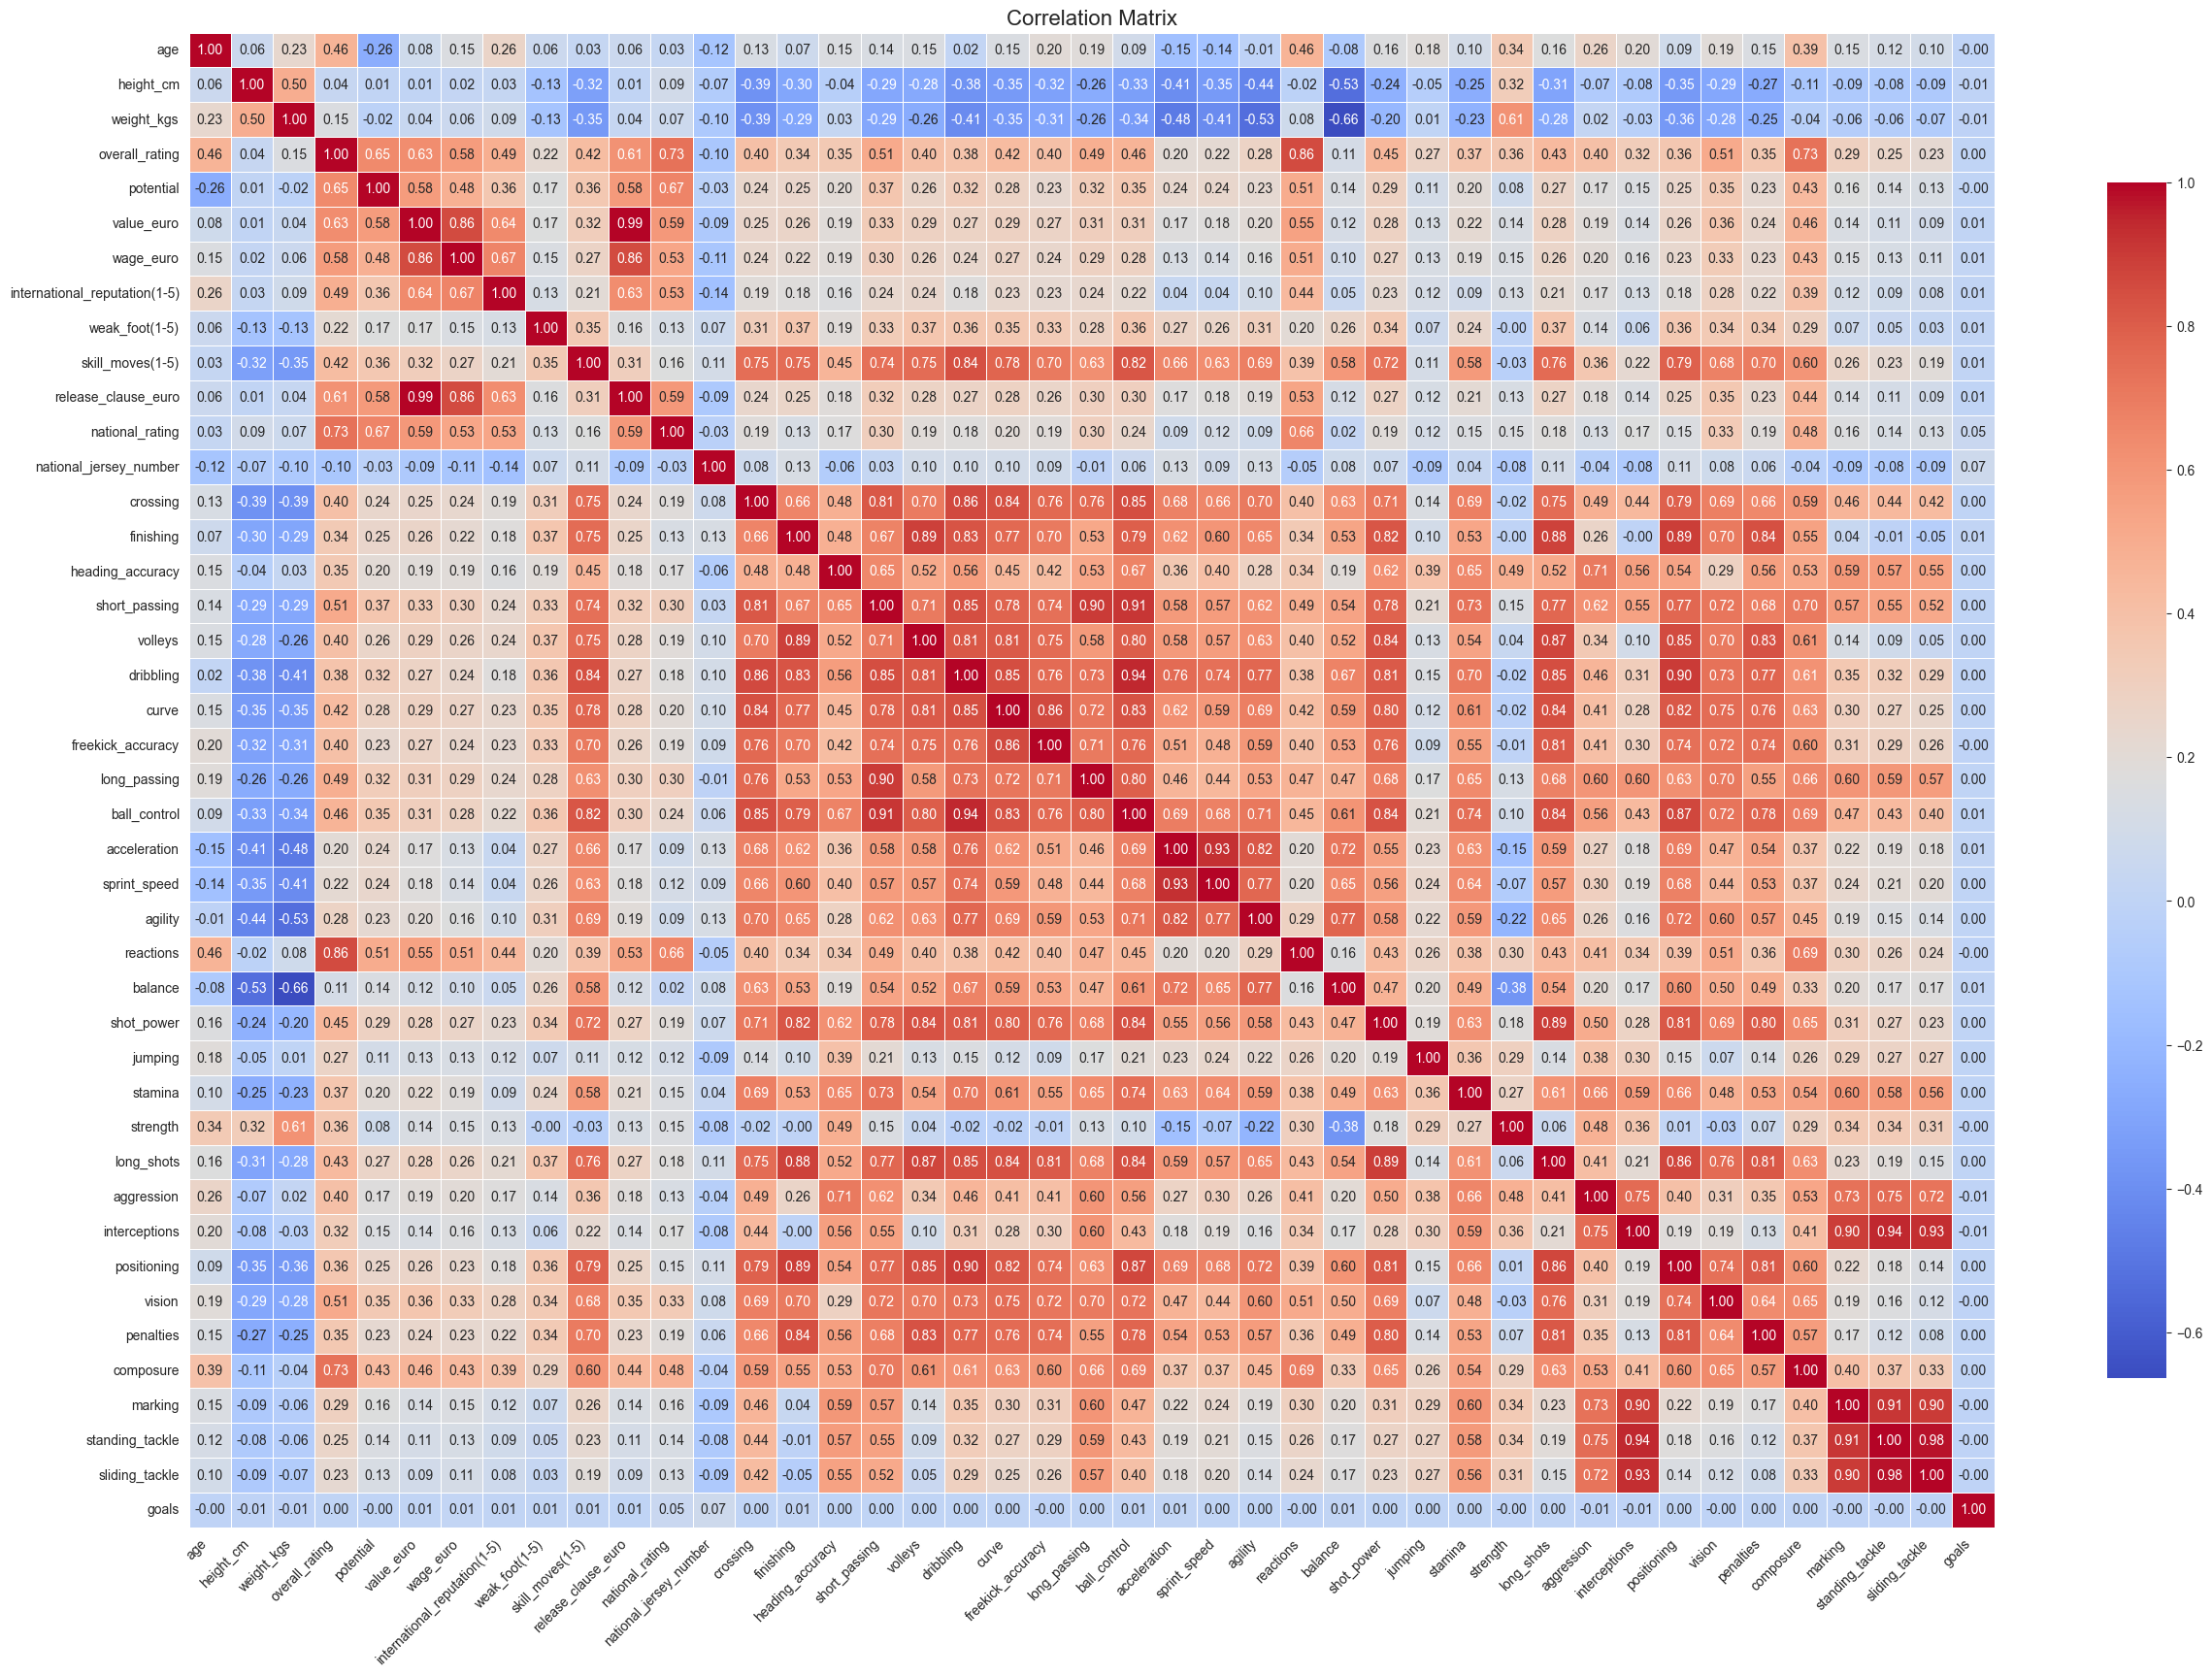

In [14]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap with improved formatting
plt.figure(figsize=(30, 20))  # Adjust figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",  # Format values to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    cbar_kws={'shrink': 0.8},  # Adjust color bar size
    linewidths=0.5  # Add space between cells
)
plt.title('Correlation Matrix', fontsize=16)  # Add a title with larger font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

In [15]:
key_attributes = {
    'pace': ['sprint_speed', 'acceleration'],
    'passing': ['short_passing', 'long_passing', 'vision', 'crossing', 'curve', 'freekick_accuracy'],
    'shooting': ['finishing', 'shot_power', 'long_shots', 'penalties', 'volleys', 'positioning'],
    'physicality': ['strength', 'stamina', 'jumping', 'aggression'],
    'dribling': ['dribbling', 'ball_control', 'agility', 'balance', 'reactions', 'composure'],
    'defending': ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'heading_accuracy']
}

# Completare valori lipsă și calcul atribute cheie
for key, related_attrs in key_attributes.items():
    for attr in related_attrs:
        if attr in df.columns:
            df[attr] = df[attr].fillna(0)  # Înlocuiește NaN cu 0
        else:
            print(f"Warning: Attribute '{attr}' is missing from the dataset.")

# Calculul mediei pentru fiecare atribut cheie
for key, related_attrs in key_attributes.items():
    if all(attr in df.columns for attr in related_attrs):
        df[key] = df[related_attrs].mean(axis=1).round().astype(int)

In [16]:
# Define key attributes
key_attributes = {
    'pace': ['sprint_speed', 'acceleration'],
    'passing': ['short_passing', 'long_passing', 'vision', 'crossing', 'curve', 'freekick_accuracy'],
    'shooting': ['finishing', 'shot_power', 'long_shots', 'penalties', 'volleys', 'positioning'],
    'physicality': ['strength', 'stamina', 'jumping', 'aggression'],
    'dribling': ['dribbling', 'ball_control', 'agility', 'balance', 'reactions', 'composure'],
    'defending': ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'heading_accuracy']
}

# Fill NaN for existing attributes and compute key attributes
created_columns = []
for key, related_attrs in key_attributes.items():
    # Check which attributes exist
    valid_attrs = [attr for attr in related_attrs if attr in df.columns]
    if valid_attrs:
        # Fill NaN with 0 for valid attributes
        for attr in valid_attrs:
            df[attr] = df[attr].fillna(0)
        # Compute mean for the key attribute
        df[key] = df[valid_attrs].mean(axis=1).round().astype(int)
        created_columns.append(key)
    else:
        print(f"Warning: Could not compute '{key}' because none of its attributes exist.")

# Check which key attributes were created
print("Created key attributes:", created_columns)

# If no key attributes were created, fall back to numeric columns
if not created_columns:
    print("No key attributes created. Falling back to numeric columns.")
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Exclude target and irrelevant columns
    exclude_cols = ['overall_rating', 'value_euro', 'goals']  # Adjust as needed
    features = [col for col in numeric_columns if col not in exclude_cols]
else:
    features = created_columns + ['age']  # Include 'age' as in your original plan

# Ensure features exist
missing_features = [f for f in features if f not in df.columns]
if missing_features:
    print(f"Error: Features {missing_features} not in DataFrame.")
else:
    print("Selected features:", features)

Created key attributes: ['pace', 'passing', 'shooting', 'physicality', 'dribling', 'defending']
Selected features: ['pace', 'passing', 'shooting', 'physicality', 'dribling', 'defending', 'age']


In [17]:
features = ['pace', 'passing', 'shooting', 'physicality', 'defending', 'age', 'dribling', 'weak_foot(1-5)',
            'skill_moves(1-5)', 'height_cm', 'weight_kgs',
            'international_reputation(1-5)']  # Removed 'positions' column

# Select features and target 
X = df[features].fillna(0)  # Handle any remaining NaN  
y = df['overall_rating'].fillna(df['overall_rating'].mean())  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test
    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAE: {mae:.2f}")


Linear Regression - MSE: 17.54, RMSE: 4.19, R²: 0.64, MAE: 3.31
Random Forest - MSE: 5.02, RMSE: 2.24, R²: 0.90, MAE: 1.54
Gradient Boosting - MSE: 5.76, RMSE: 2.40, R²: 0.88, MAE: 1.71


In [18]:
print(X_train.columns)

Index(['pace', 'passing', 'shooting', 'physicality', 'defending', 'age',
       'dribling', 'weak_foot(1-5)', 'skill_moves(1-5)', 'height_cm',
       'weight_kgs', 'international_reputation(1-5)'],
      dtype='object')


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate 
for name, model in models.items():
    # Use scaled data for Linear Regression, unscaled for tree-based models
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test

    model.fit(X_train_data, y_train)
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


Linear Regression - MSE: 17.54, RMSE: 4.19, MAE: 3.31, R²: 0.64
Random Forest - MSE: 5.02, RMSE: 2.24, MAE: 1.54, R²: 0.90
Gradient Boosting - MSE: 5.76, RMSE: 2.40, MAE: 1.71, R²: 0.88


In [24]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Store best models
best_models = {}

# Perform GridSearchCV
for name, model in models.items():
    if param_grids[name]:  # Only run GridSearch if there are parameters to tune
        grid_search = GridSearchCV(
            model,
            param_grids[name],
            cv=5,
            scoring=['neg_mean_squared_error', 'neg_root_mean_squared_error'],
            refit='neg_root_mean_squared_error',
            n_jobs=-1
        )
        X_train_data = X_train_scaled if name == "Linear Regression" else X_train
        grid_search.fit(X_train_data, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"{name} Best Params: {grid_search.best_params_}")
    else:
        best_models[name] = model  # Use the original model if no tuning


Random Forest Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}



Linear Regression Cross-Validation:
CV R² scores: [0.63245468 0.61639839 0.61707875 0.62120319 0.62843581]
Mean CV R²: 0.62 ± 0.01
Test Set - MSE: 17.54, RMSE: 4.19, MAE: 3.31, R²: 0.64

Random Forest Cross-Validation:
CV R² scores: [0.90096456 0.90393439 0.89301469 0.8990678  0.89996776]
Mean CV R²: 0.90 ± 0.00
Test Set - MSE: 4.98, RMSE: 2.23, MAE: 1.54, R²: 0.90

Gradient Boosting Cross-Validation:
CV R² scores: [0.90617493 0.90468421 0.89535311 0.90219094 0.9052874 ]
Mean CV R²: 0.90 ± 0.00
Test Set - MSE: 4.79, RMSE: 2.19, MAE: 1.51, R²: 0.90


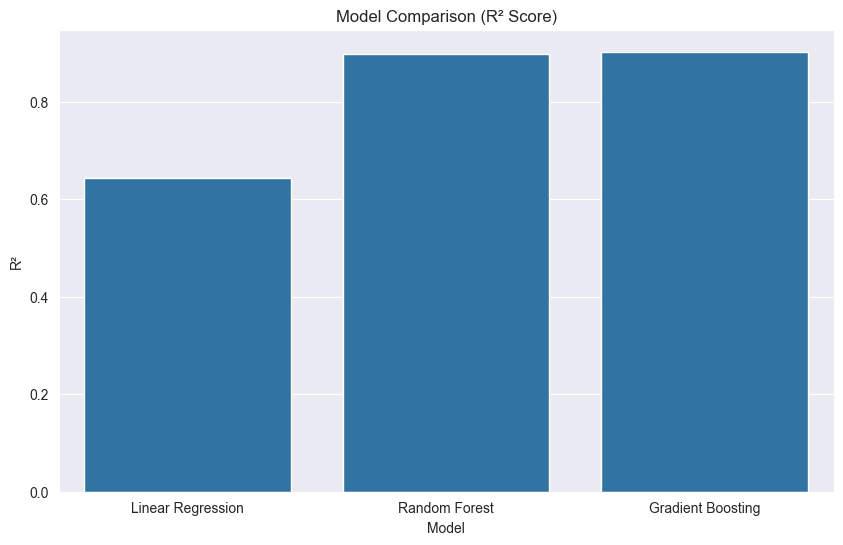

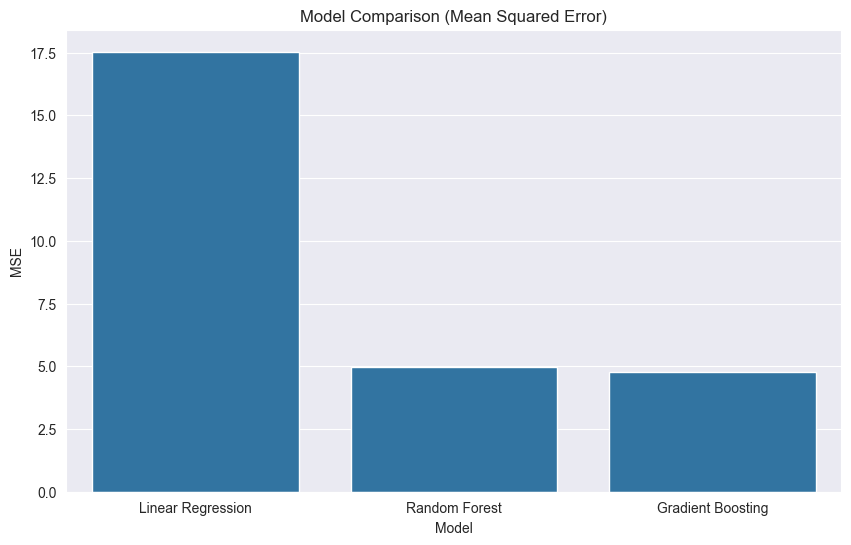

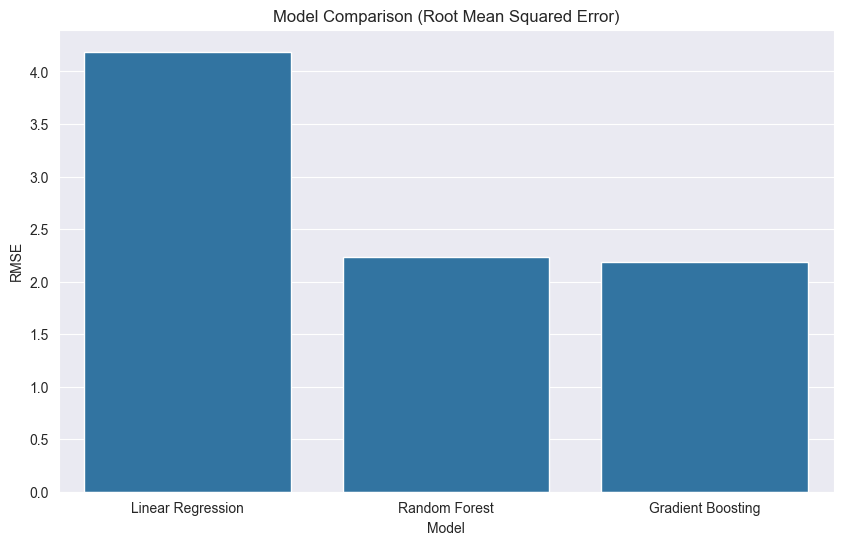

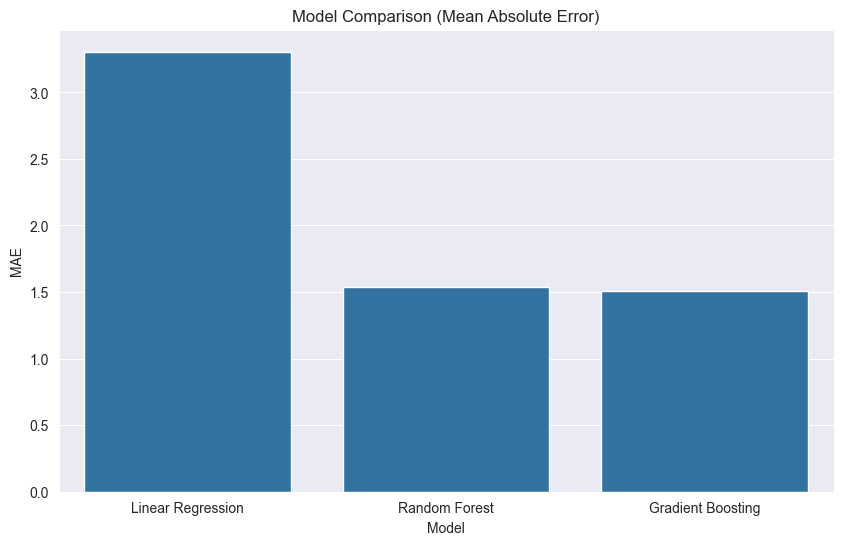

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Evaluate tuned models
final_results = []
for name, model in best_models.items():
    # Cross validation on training data
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    cv_scores = cross_val_score(model, X_train_data, y_train, cv=5, scoring='r2')
    print(f"\n{name} Cross-Validation:")
    print(f"CV R² scores: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

    # Test set evaluation
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    final_results.append({"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2, "CV R²": cv_scores.mean()})
    print(f"Test Set - MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# Create a DataFrame for comparison
results_df = pd.DataFrame(final_results)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R²", data=results_df)
plt.title("Model Comparison (R² Score)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MSE", data=results_df)
plt.title("Model Comparison (Mean Squared Error)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("Model Comparison (Root Mean Squared Error)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="MAE", data=results_df)
plt.title("Model Comparison (Mean Absolute Error)")
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score

for name, model in best_models.items():
    X_train_data = X_train_scaled if name == "Linear Regression" else X_train
    cv_scores = cross_val_score(model, X_train_data, y_train, cv=5, scoring='r2')
    print(f"{name} CV R²: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Linear Regression CV R²: 0.62 ± 0.01
Random Forest CV R²: 0.90 ± 0.00
Gradient Boosting CV R²: 0.90 ± 0.00


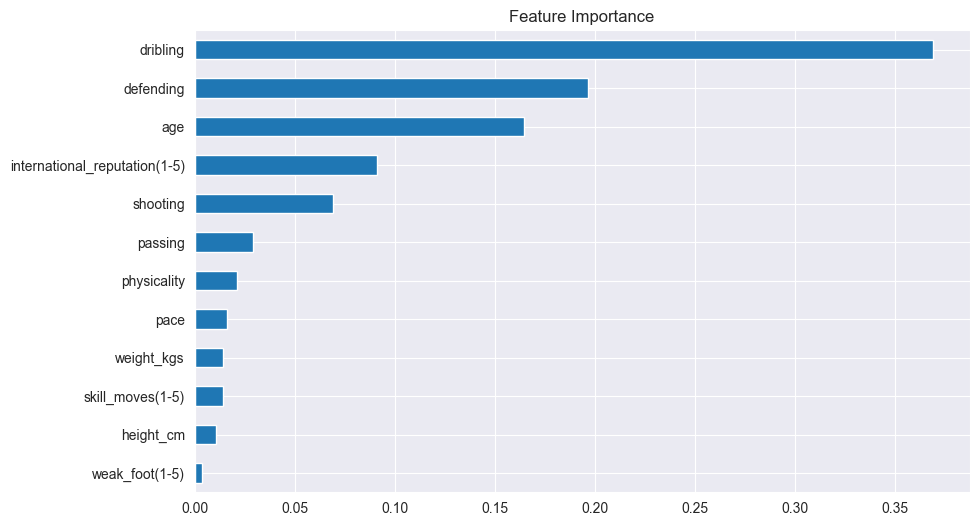

In [27]:
best_model = best_models["Random Forest"]  # Example
importances = pd.Series(best_model.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

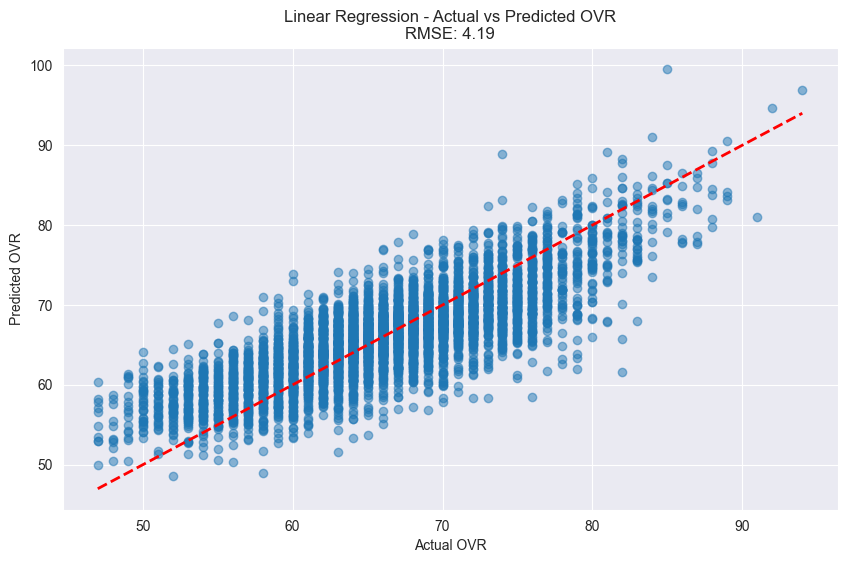

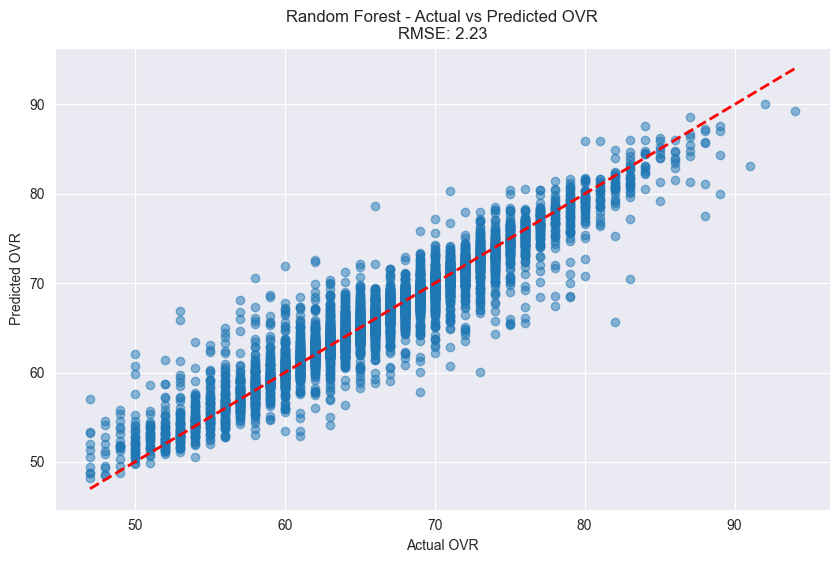

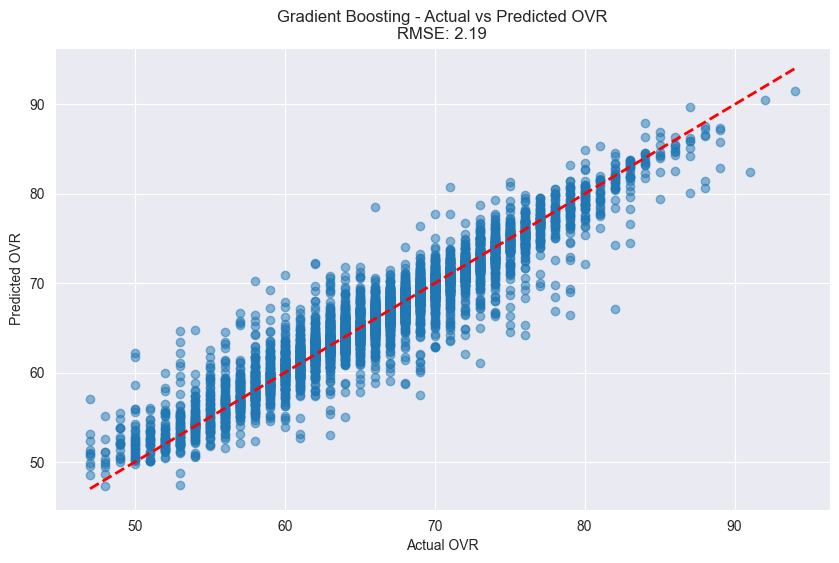

In [28]:
import pandas as pd

for name, model in best_models.items():
    # Alegeți setul de test corespunzător
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test

    # Pentru modelele care cer nume de coloane, convertim X_test într-un DataFrame
    if name != "Linear Regression":
        X_test_data = pd.DataFrame(X_test_data, columns=features)  # 'features' reprezintă numele coloanelor originale

    # Predicția
    y_pred = model.predict(X_test_data)

    # Calculul RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Vizualizarea rezultatelor
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual OVR')
    plt.ylabel('Predicted OVR')
    plt.title(f'{name} - Actual vs Predicted OVR\nRMSE: {rmse:.2f}')
    plt.show()


In [29]:
print(best_models)

{'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42), 'Gradient Boosting': GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)}


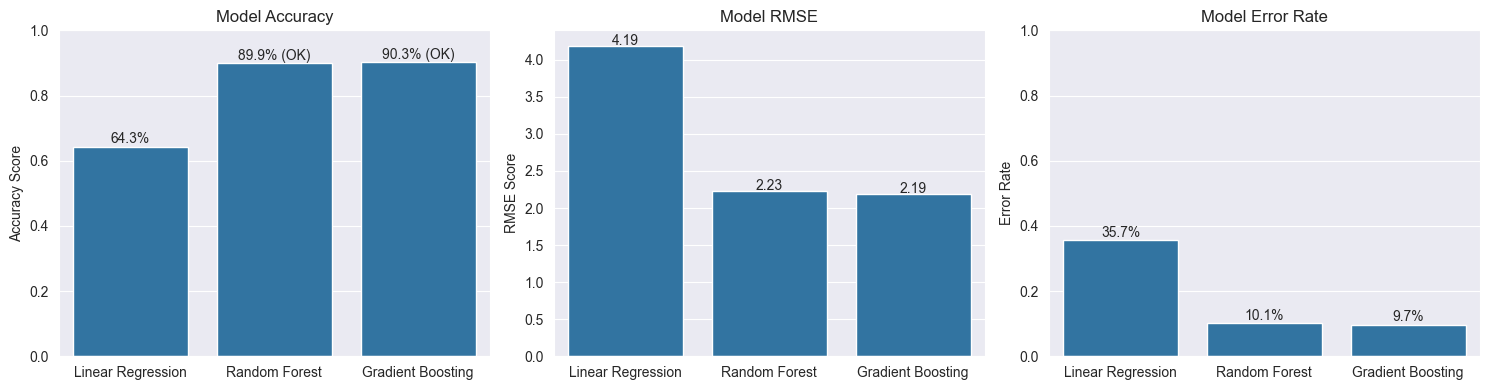


Linear Regression Metrics:
R² Score: 0.643
RMSE Score: 4.188
MSE Score: 17.538
MAE Score: 3.305
Error Rate: 0.357

Random Forest Metrics:
R² Score: 0.899
RMSE Score: 2.231
MSE Score: 4.978
MAE Score: 1.538
Error Rate: 0.101

Gradient Boosting Metrics:
R² Score: 0.903
RMSE Score: 2.188
MSE Score: 4.786
MAE Score: 1.510
Error Rate: 0.097


In [30]:
from sklearn.metrics import accuracy_score, classification_report

# Remove or comment out this line if it's causing confusion (model.fit(X, y))
#model.fit(X, y)

accuracy_scores = {}
rmse_scores = {}  # Add RMSE scores dictionary
for name, model in best_models.items():
    # Use scaled data for Linear Regression, unscaled for others
    X_test_data_temp = X_test_scaled if name == "Linear Regression" else X_test
    accuracy_scores[name] = model.score(X_test_data_temp, y_test)

    # Calculate RMSE
    y_pred = model.predict(X_test_data_temp)
    rmse_scores[name] = np.sqrt(mean_squared_error(y_test, y_pred))

# Create comparison plots
plt.figure(figsize=(15, 4))

# Plot accuracy scores
plt.subplot(1, 3, 1)
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, v in enumerate(accuracy_scores.values()):
    percentage = v * 100
    if percentage > 95:
        label = f'{percentage:.1f}% (Deep Learning)'
    elif percentage >= 89:
        label = f'{percentage:.1f}% (OK)'
    else:
        label = f'{percentage:.1f}%'
    plt.text(i, v + 0.01, label, ha='center')

# Plot RMSE scores
plt.subplot(1, 3, 2)
sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()))
plt.title('Model RMSE')
plt.ylabel('RMSE Score')

for i, v in enumerate(rmse_scores.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

# Plot error rates
plt.subplot(1, 3, 3)
error_rates = [1 - acc for acc in accuracy_scores.values()]
sns.barplot(x=list(accuracy_scores.keys()), y=error_rates)
plt.title('Model Error Rate')
plt.ylabel('Error Rate')
plt.ylim(0, 1)

for i, v in enumerate(error_rates):
    percentage = v * 100
    plt.text(i, v + 0.01, f'{percentage:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Print detailed metrics for each model  
for name, model in best_models.items():
    print(f"\n{name} Metrics:")
    X_test_data_temp = X_test_scaled if name == "Linear Regression" else X_test
    y_pred = model.predict(X_test_data_temp)
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
    print(f"MSE Score: {mean_squared_error(y_test, y_pred):.3f}")
    print(f"MAE Score: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"Error Rate: {(1 - model.score(X_test_data_temp, y_test)):.3f}")


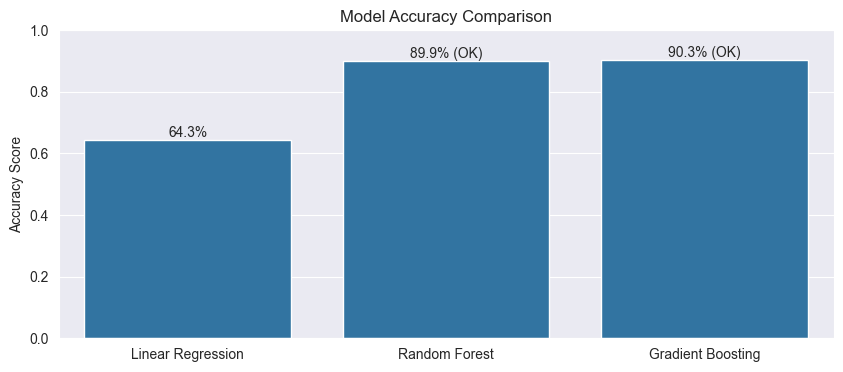


Linear Regression Metrics:
R² Score: 0.643
MSE Score: 17.538
MAE Score: 3.305
RMSE Score: 4.188

Random Forest Metrics:
R² Score: 0.899
MSE Score: 4.978
MAE Score: 1.538
RMSE Score: 2.231

Gradient Boosting Metrics:
R² Score: 0.903
MSE Score: 4.786
MAE Score: 1.510
RMSE Score: 2.188


In [32]:
from sklearn.metrics import accuracy_score, classification_report

# Remove or comment out this line if it's causing confusion (model.fit(X, y))
#model.fit(X, y)

accuracy_scores = {}
for name, model in best_models.items():
    # Use scaled data for Linear Regression, unscaled for others
    X_test_data_temp = X_test_scaled if name == "Linear Regression" else X_test
    accuracy_scores[name] = model.score(X_test_data_temp, y_test)

# Create accuracy comparison plot
plt.figure(figsize=(10, 4))
models_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

sns.barplot(x=models_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis from 0 to 1

for i, v in enumerate(accuracies):
    percentage = v * 100
    if percentage > 95:
        label = f'{percentage:.1f}% (Deep Learning)'
    elif percentage >= 89:
        label = f'{percentage:.1f}% (OK)'
    else:
        label = f'{percentage:.1f}%'
    plt.text(i, v + 0.01, label, ha='center')
plt.show()

# Print detailed metrics for each model  
for name, model in best_models.items():
    print(f"\n{name} Metrics:")
    X_test_data_temp = X_test_scaled if name == "Linear Regression" else X_test
    y_pred = model.predict(X_test_data_temp)
    print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
    print(f"MSE Score: {mean_squared_error(y_test, y_pred):.3f}")
    print(f"MAE Score: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

In [33]:
# Final Model Selection and Analysis

print("\nSummary of Hyperparameter Optimization and Model Comparisons:")

model = RandomForestRegressor(
    n_estimators=100,  # Număr de arbori
    max_depth=10,      # Adâncimea maximă a arborilor
    min_samples_split=5,  # Minim eșantioane pentru împărțire
    random_state=42) # Pentru reproducibilitate


final_summary = []
for name, model in best_models.items():
    # Use scaled data for Linear Regression, unscaled for others
    X_test_data = X_test_scaled if name == "Linear Regression" else X_test
    y_pred = model.predict(X_test_data)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # For models with hyperparameters tuned, print the best parameters from grid search
    best_params = None
    if name in param_grids and param_grids[name]:
        best_params = {k: v for k, v in model.get_params().items() if k in param_grids[name]}
    
    final_summary.append({
         "Model": name,
         "MAE": mae,
         "MSE": mse,
         "R²": r2,
        "RMSE":rmse,
         "Hyperparameters": best_params
    })
    
    print(f"\n{name}:")
    print(f"    RMSE: {rmse:.3f}")
    print(f"    MAE: {mae:.3f}")
    print(f"    MSE: {mse:.3f}")
    print(f"    R²: {r2:.3f}")
    if best_params:
        print(f"    Best Hyperparameters: {best_params}")

# Create a DataFrame for overall comparison
final_results_df = pd.DataFrame(final_summary)
print("\nComparison of Models:")
print(final_results_df)

# Select the final model based on the highest R² score
final_model_info = final_results_df.loc[final_results_df["R²"].idxmax()]
final_model_name = final_model_info["Model"]
final_model = best_models[final_model_name]

print(f"\nChosen Final Model: {final_model_name}")


Summary of Hyperparameter Optimization and Model Comparisons:

Linear Regression:
    RMSE: 4.188
    MAE: 3.305
    MSE: 17.538
    R²: 0.643

Random Forest:
    RMSE: 2.231
    MAE: 1.538
    MSE: 4.978
    R²: 0.899
    Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Gradient Boosting:
    RMSE: 2.188
    MAE: 1.510
    MSE: 4.786
    R²: 0.903
    Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Comparison of Models:
               Model       MAE        MSE        R²      RMSE  \
0  Linear Regression  3.305415  17.537511  0.643478  4.187781   
1      Random Forest  1.538049   4.977902  0.898804  2.231121   
2  Gradient Boosting  1.510021   4.785507  0.902715  2.187580   

                                     Hyperparameters  
0                                               None  
1  {'max_depth': 20, 'min_samples_split': 2, 'n_e...  
2  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  

Chosen Final Model: 

 98%|===================| 5266/5387 [00:21<00:00]        

📌 Predicția modelului: 65.30
⚖️ Valoare de bază (medie SHAP): 66.38

🔼 Trăsături care au crescut predicția:
 - shooting: +2.07
 - physicality: +0.26
 - dribling: +0.19

🔽 Trăsături care au scăzut predicția:
 - pace: -0.34
 - skill_moves(1-5): -1.07
 - defending: -2.22


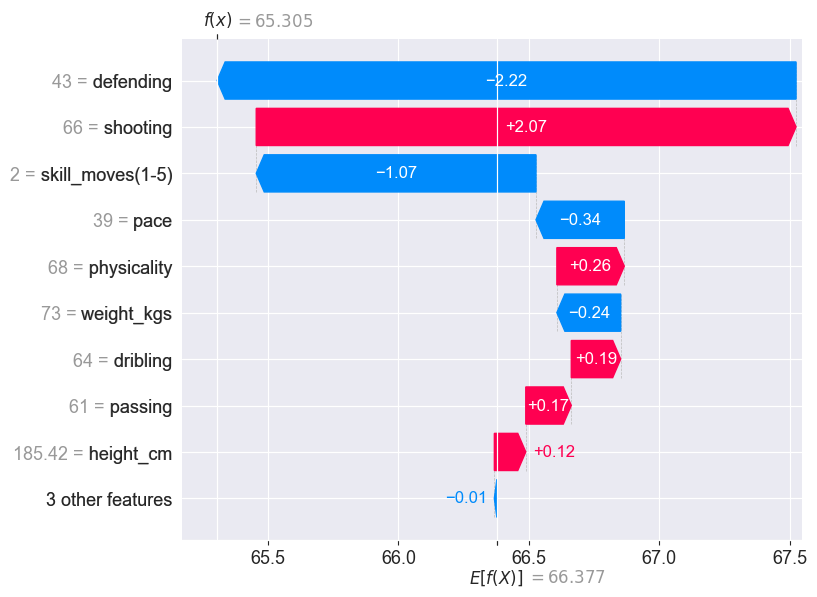

In [38]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

import shap
import matplotlib.pyplot as plt

# Selectăm modelul Gradient Boosting și datele de test
model = best_models["Gradient Boosting"]
X_sample = X_test.copy()

# Inițializăm SHAP explainer pentru modelul nostru de regresie
explainer = shap.TreeExplainer(model, X_sample)
shap_values = explainer(X_sample)

# Alegem o instanță (poți schimba indexul)
index = 0
features = X_sample.iloc[index]
shap_vals = shap_values[index]

# Calculăm predicția
prediction = model.predict([features])[0]
base_value = shap_vals.base_values

# Obținem top influențe pozitive și negative
contrib = list(zip(X_sample.columns, shap_vals.values))
contrib_sorted = sorted(contrib, key=lambda x: x[1], reverse=True)
top_positive = contrib_sorted[:3]
top_negative = contrib_sorted[-3:]

# Afișăm interpretarea textuală
print(f"📌 Predicția modelului: {prediction:.2f}")
print(f"⚖️ Valoare de bază (medie SHAP): {base_value:.2f}")
print("\n🔼 Trăsături care au crescut predicția:")
for feature, val in top_positive:
    print(f" - {feature}: +{val:.2f}")

print("\n🔽 Trăsături care au scăzut predicția:")
for feature, val in top_negative:
    print(f" - {feature}: {val:.2f}")

# Vizualizare SHAP waterfall
shap.plots.waterfall(shap_vals)


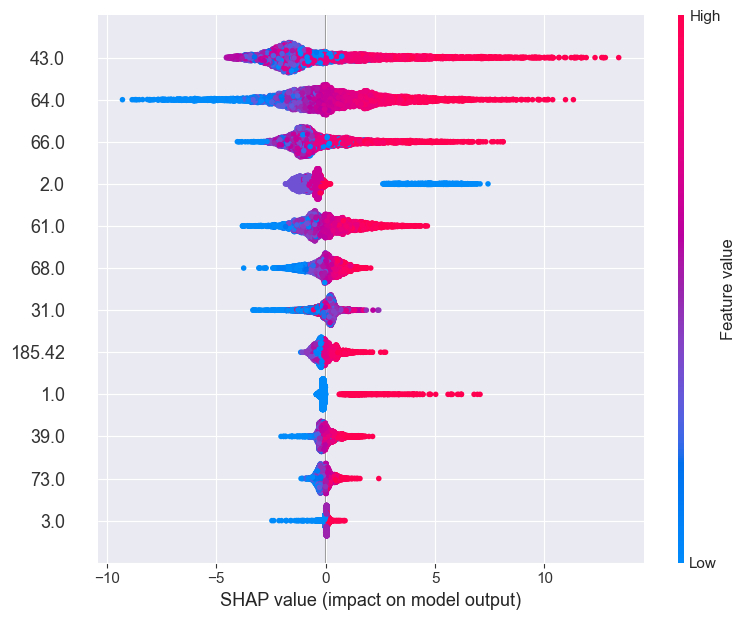

In [39]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Feature importance generală pe baza valorilor SHAP
plt.title("Importanța Caracteristicilor bazată pe SHAP (Global)")
shap.summary_plot(shap_values, X_test, feature_names=features)


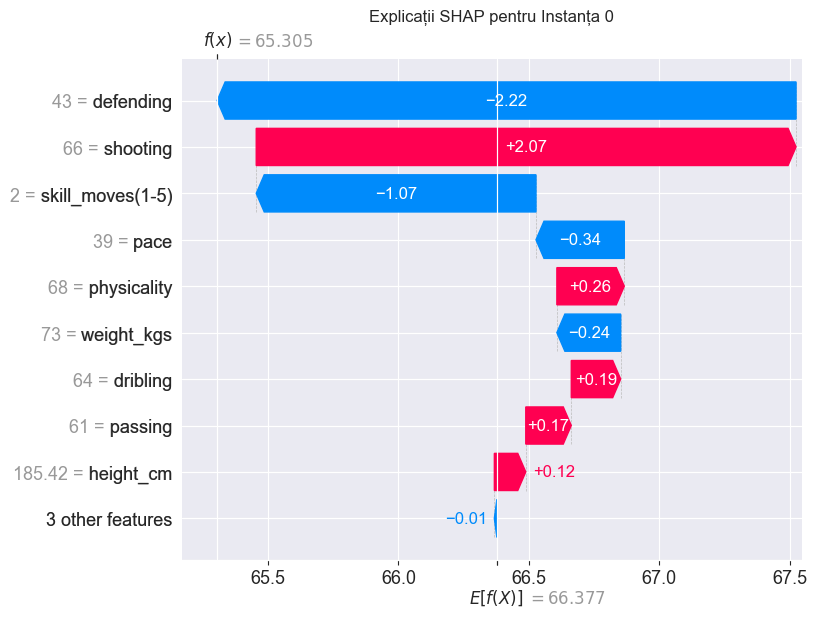

In [40]:
# Explicații pentru o instanță specifică
instance_idx = 0  # Indexul instanței analizate
instance = X_test.iloc[instance_idx]

# Vizualizare explicații pentru instanța specifică
plt.title(f"Explicații SHAP pentru Instanța {instance_idx}")
shap.plots.waterfall(shap_values[instance_idx], max_display=10)